In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import csv file

In [5]:
df = pd.read_csv('car_prices.csv')

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


### Preprocessing

In [8]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [11]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [12]:
# Dropping Columns which are not necessary

unnecessary_cols = ['trim', 'vin', 'mmr', 'seller']
df = df.drop(columns = unnecessary_cols, axis=1)

In [13]:
# Renaming Columns for better understanding
df = df.rename(columns = {'year':'Year',
                     'make':'Company',
                     'model':'Car_model',
                     'body':'Car_body',
                     'transmission':'Transmission_type',
                     'state':'State_of_car',
                     'conditon':'Condition',
                     'odometer' : 'Odometer_reading',
                     'color': 'Color',
                     'interior' : 'Interior_type',
                     'sellingprice':'Selling_price',
                     'saledate':'Date of Selling'})

In [14]:
df.head()

,Year,Company,Car_model,Car_body,Transmission_type,State_of_car,condition,Odometer_reading,Color,Interior_type,Selling_price,Date of Selling
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,black,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,black,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,black,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [15]:
# Finding the top five selling cars for the analysis

top_cars = df['Company'].value_counts().nlargest(5)
top_cars.head()


Ford         81013
Chevrolet    54150
Nissan       44043
Toyota       35313
Dodge        27181
Name: Company, dtype: int64

In [16]:
# taking the data of only the top five cars for analysis

top_cars_list = ['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge'] 
top_cars_df = df[df['Company'].isin(top_cars_list)].copy()
top_cars_df.reset_index(drop=True, inplace=True)

In [17]:
top_cars_df.tail()

,Year,Company,Car_model,Car_body,Transmission_type,State_of_car,condition,Odometer_reading,Color,Interior_type,Selling_price,Date of Selling
241695,2012,Ford,Escape,SUV,automatic,fl,38.0,74673.0,white,gray,11400.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
241696,2012,Chevrolet,Silverado 1500,Crew Cab,automatic,tx,37.0,37908.0,white,black,23000.0,Tue Jul 07 2015 06:00:00 GMT-0700 (PDT)
241697,2012,Dodge,Grand Caravan,Minivan,automatic,ma,37.0,97036.0,silver,gray,7800.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
241698,2015,Nissan,Altima,sedan,automatic,ga,38.0,16658.0,white,black,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
241699,2014,Ford,F-150,SuperCrew,automatic,ca,34.0,15008.0,gray,gray,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [18]:
from datetime import datetime
top_cars_df['Date of Selling'] = top_cars_df['Date of Selling'].str.replace(r' GMT[+-]\d{4} \(\w+\)', '')
top_cars_df['Date of Selling'] = pd.to_datetime(top_cars_df['Date of Selling'], format = '%a %b %d %Y %H:%M:%S').dt.strftime('%d-%m-%Y')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4780\2393821238.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  top_cars_df['Date of Selling'] = top_cars_df['Date of Selling'].str.replace(r' GMT[+-]\d{4} \(\w+\)', '')


## Statistical Analysis of Top 5 Cars Company

In [19]:
mean_price = top_cars_df['Selling_price'].mean()
sd_price = df['Selling_price'].std()
skewness_price = df['Selling_price'].skew()
kurtosis_price = df['Selling_price'].kurt()

print(f"The mean selling price is {mean_price}. \nThe Standard Deviation is {sd_price}. \nThe Skewness price is {skewness_price}. \nThe Kurtosis price is {kurtosis_price}.") 

The mean selling price is 12817.328551923873. 
The Standard Deviation is 9613.033737691436. 
The Skewness price is 2.0035401953251544. 
The Kurtosis price is 12.057603274130717.


In [20]:
# Descriptive Analysis of Numerical and Categorical data of cars

numerical_data = ['Odometer_reading', 'Year', 'condition', 'Selling_price']
categorical_data = ['Company', 'Car_model', 'Car_body', 'Transmission_type', 'Color', 'Interior_type']

print(top_cars_df[numerical_data].describe())
print()
print(top_cars_df[categorical_data].describe())

       Odometer_reading           Year      condition  Selling_price
count     241700.000000  241700.000000  241700.000000  241700.000000
mean       66387.044485    2010.619640      30.780161   12817.328552
std        51774.702849       3.594408      13.305250    7805.254262
min            1.000000    1990.000000       1.000000       1.000000
25%        28888.000000    2009.000000      24.000000    7600.000000
50%        51255.000000    2012.000000      35.000000   12000.000000
75%        94015.000000    2013.000000      42.000000   16600.000000
max       999999.000000    2015.000000      49.000000  230000.000000

       Company Car_model Car_body Transmission_type   Color Interior_type
count   241700    241700   241700            241700  241700        241700
unique       5       196       48                 2      20            17
top       Ford    Altima    Sedan         automatic   white         black
freq     81013     16346    85558            236156   49935        108732


In [21]:
# Checking the correlation of the numerical data.

correlation_matrix = top_cars_df[numerical_data].corr()
print(correlation_matrix)

                  Odometer_reading      Year  condition  Selling_price
Odometer_reading          1.000000 -0.765931  -0.303290      -0.582451
Year                     -0.765931  1.000000   0.323321       0.594102
condition                -0.303290  0.323321   1.000000       0.321662
Selling_price            -0.582451  0.594102   0.321662       1.000000


## Graphical Analysis

In [22]:
def bar_plot(df):
    data = df['Company'].value_counts()
    data.plot(kind = 'bar', figsize=(10,6), color = 'skyblue')
    plt.title('Selling of Top five Cars')
    plt.xlabel('Company')
    plt.ylabel('Numbers of Units Sold')
    plt.savefig('bar_plot.jpg')
    plt.show()

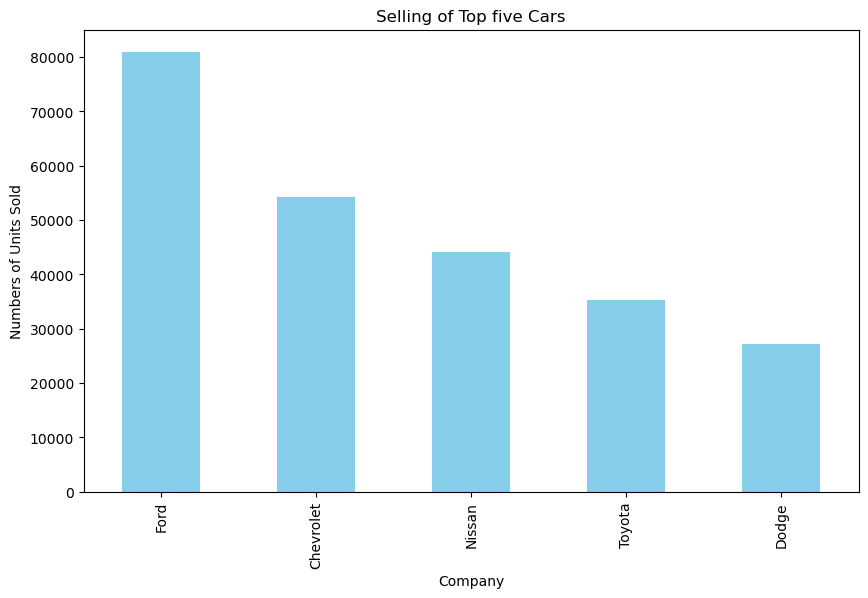

In [23]:
bar_plot(top_cars_df)

In [24]:
def pie_chart(df):
    data = df['Company'].value_counts()
    data.plot(kind = 'pie', autopct = '%0.2f%%', figsize = (8,8))
    plt.title('Market Share of Top Selling Companies')
    plt.savefig('pie_chart.jpg')
    plt.show()

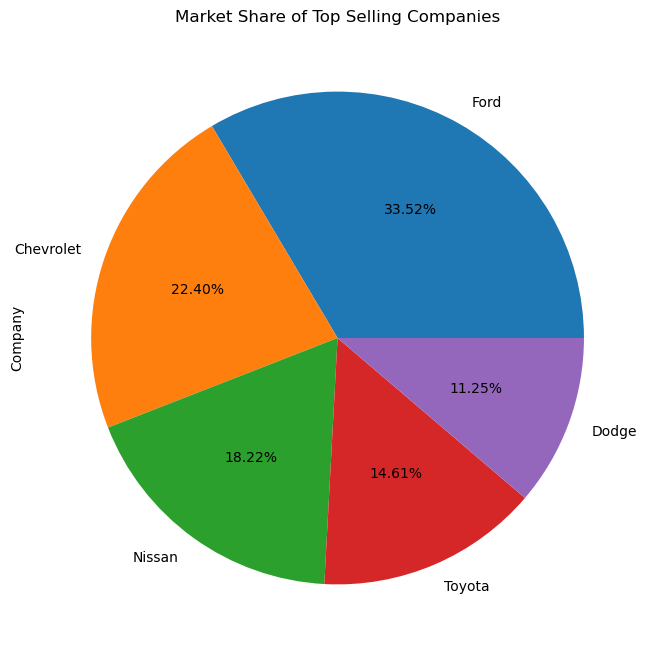

In [25]:
pie_chart(top_cars_df)

In [26]:
def price_trends(dataframe):
    
    dataframe['Date of Selling'] = pd.to_datetime(dataframe['Date of Selling'], dayfirst = True)
     
    for car in top_cars_list:
        data = dataframe[dataframe['Company'] == car]
        data.set_index('Date of Selling', inplace = True)
        monthly = data['Selling_price'].resample('M').mean()
       
        monthly.plot(label = car)
    
    plt.title('Price Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Selling Price')
    plt.legend()
    plt.savefig('price_trends1.jpg')
    plt.show()

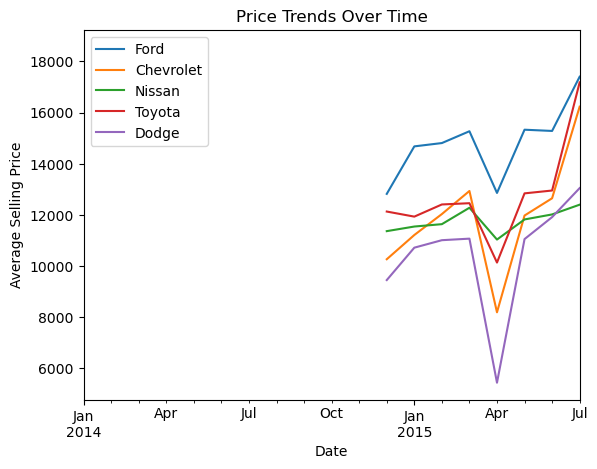

In [27]:
price_trends(top_cars_df)

In [28]:
def box_plot(df):
    df.boxplot(column='Selling_price', by='Company', figsize=(12,8))
    plt.title('Distribution of Selling Prices')
    plt.xlabel('Company')
    plt.ylabel('Selling Price')
    plt.savefig('box_plot.jpg')
    plt.show()

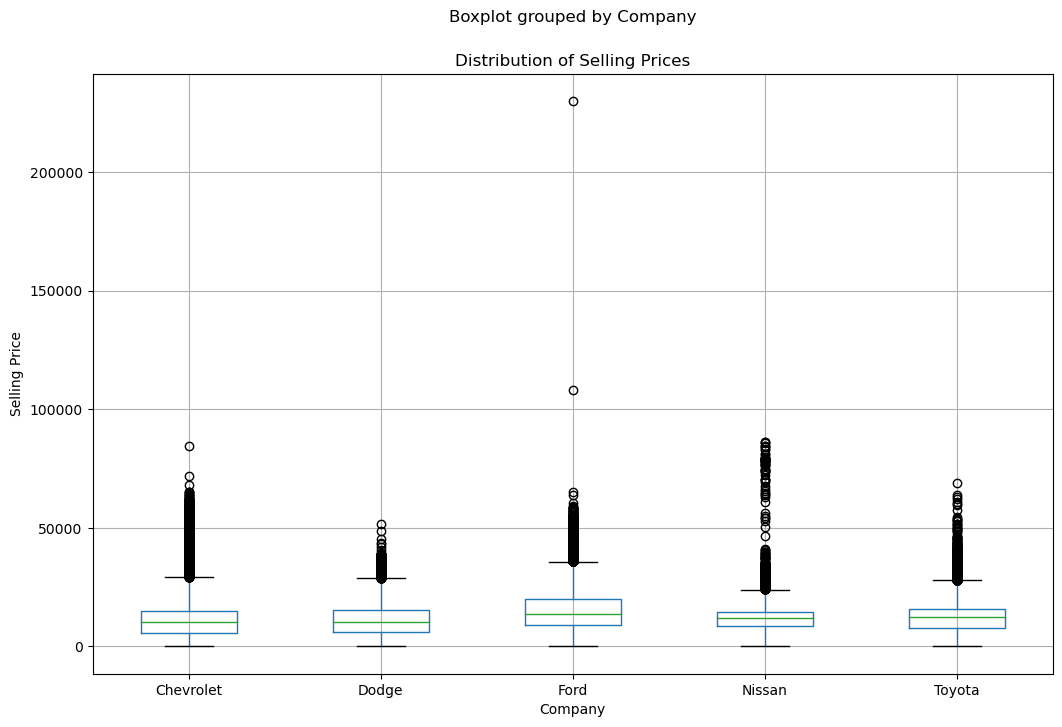

In [29]:
box_plot(top_cars_df)